In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import seaborn as sns
import numpy as np


##Task 1

In [ ]:
reviews_df = pd.read_csv('master-dataset.csv')

In [ ]:
reviews_df

,Customer,text,title,hotel_Name,numberOfReviews,finalRating
0,lauradog95,I had a wonderful stay at Colombo Court Hotel ...,"Fantastic, comfortable experience",Colombo Court Hotel & Spa,1340,5
1,Rach-Marg,The staff were incredibly welcoming and attent...,Great stay! Gorgeous authentic Sri Lankan Expe...,Colombo Court Hotel & Spa,1340,5
2,HED249,"Always a peace heaven when in Colombo 3, perfe...",Boutique hotel of all,Colombo Court Hotel & Spa,1340,5
3,tomasa317,The room was spacious. The service personnel w...,A boutique hotel like home,Colombo Court Hotel & Spa,1340,4
4,Culture41710159424,Good hotel and nice room. Good value for money...,Excellent location and friendly staff,Colombo Court Hotel & Spa,1340,5
...,...,...,...,...,...,...
9944,U5407KOdd,"Located in the City of Kandy, this is one hote...",Amaara Sky Hotel,Amaara Sky Hotel,489,5
9945,melanien462,We had a very comfortable and enjoyable stay a...,Enjoyable and comfortable experience,Amaara Sky Hotel,489,5
9946,obhashap,We stayed at Amaara Sky Kandy for 2 days. My ...,Best place to stay in KANDY,Amaara Sky Hotel,489,5
9947,charithb2023,Hotel accommodation and food were really good....,Good Times,Amaara Sky Hotel,489,5


In [ ]:
print(reviews_df.head())

             Customer                                               text  \
0          lauradog95  I had a wonderful stay at Colombo Court Hotel ...   
1           Rach-Marg  The staff were incredibly welcoming and attent...   
2              HED249  Always a peace heaven when in Colombo 3, perfe...   
3           tomasa317  The room was spacious. The service personnel w...   
4  Culture41710159424  Good hotel and nice room. Good value for money...   

                                               title  \
0                  Fantastic, comfortable experience   
1  Great stay! Gorgeous authentic Sri Lankan Expe...   
2                              Boutique hotel of all   
3                         A boutique hotel like home   
4              Excellent location and friendly staff   

                  hotel_Name  numberOfReviews  finalRating  
0  Colombo Court Hotel & Spa             1340            5  
1  Colombo Court Hotel & Spa             1340            5  
2  Colombo Court Hotel 

In [ ]:
print(reviews_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9949 entries, 0 to 9948
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Customer         9901 non-null   object
 1   text             9949 non-null   object
 2   title            9948 non-null   object
 3   hotel_Name       9949 non-null   object
 4   numberOfReviews  9949 non-null   int64 
 5   finalRating      9949 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 466.5+ KB
None


In [ ]:
print(reviews_df.describe())

       numberOfReviews  finalRating
count      9949.000000  9949.000000
mean       1060.352900     4.660368
std        1038.479149     0.818180
min          61.000000     1.000000
25%         346.000000     5.000000
50%         675.000000     5.000000
75%        1340.000000     5.000000
max        4991.000000     5.000000


Handling Missing Data

In [ ]:
reviews_df.dropna(inplace=True)

In [ ]:
reviews_df

,Customer,text,title,hotel_Name,numberOfReviews,finalRating
0,lauradog95,I had a wonderful stay at Colombo Court Hotel ...,"Fantastic, comfortable experience",Colombo Court Hotel & Spa,1340,5
1,Rach-Marg,The staff were incredibly welcoming and attent...,Great stay! Gorgeous authentic Sri Lankan Expe...,Colombo Court Hotel & Spa,1340,5
2,HED249,"Always a peace heaven when in Colombo 3, perfe...",Boutique hotel of all,Colombo Court Hotel & Spa,1340,5
3,tomasa317,The room was spacious. The service personnel w...,A boutique hotel like home,Colombo Court Hotel & Spa,1340,4
4,Culture41710159424,Good hotel and nice room. Good value for money...,Excellent location and friendly staff,Colombo Court Hotel & Spa,1340,5
...,...,...,...,...,...,...
9944,U5407KOdd,"Located in the City of Kandy, this is one hote...",Amaara Sky Hotel,Amaara Sky Hotel,489,5
9945,melanien462,We had a very comfortable and enjoyable stay a...,Enjoyable and comfortable experience,Amaara Sky Hotel,489,5
9946,obhashap,We stayed at Amaara Sky Kandy for 2 days. My ...,Best place to stay in KANDY,Amaara Sky Hotel,489,5
9947,charithb2023,Hotel accommodation and food were really good....,Good Times,Amaara Sky Hotel,489,5


Remove duplicates

In [ ]:
reviews_df.drop_duplicates(inplace=True)

Number of Hotels and Reviews

In [ ]:
pip install langdetect

In [ ]:
pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 6.7 MB/s eta 0:00:00


In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from langdetect import detect
import emoji
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#get English stop words
stop_words = set(stopwords.words('english'))

#function to detect if a text is in english
def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False

#fucntion to remove emojis from text
def remove_emojis(text):
    return emoji.demojize(text)

#function to clean the review
def clean_review(text):
  if is_english(text):
    text = remove_emojis(text)
    #convert to lowercase
    text = text.lower()
    text = re.sub(r'http\S+', '', text) #urls

    #remove special characters
    text = re.sub(r'[^a-zA-z0-9\s]','',text)
    text = re.sub(r'\s+',' ',text).strip() #remove spaces

    #remove stop words
    words = text.split()
    words = [word for word in words if word not in stop_words]
    text = ' '.join(words)
    return text if text else None
  else:
    return None

reviews_df['cleaned_text'] = reviews_df['text'].apply(clean_review)

In [ ]:
reviews_df.head(
)

,Customer,text,title,hotel_Name,numberOfReviews,finalRating,cleaned_text
0,lauradog95,I had a wonderful stay at Colombo Court Hotel ...,"Fantastic, comfortable experience",Colombo Court Hotel & Spa,1340,5,wonderful stay colombo court hotel spa whilst ...
1,Rach-Marg,The staff were incredibly welcoming and attent...,Great stay! Gorgeous authentic Sri Lankan Expe...,Colombo Court Hotel & Spa,1340,5,staff incredibly welcoming attentive mohammed ...
2,HED249,"Always a peace heaven when in Colombo 3, perfe...",Boutique hotel of all,Colombo Court Hotel & Spa,1340,5,always peace heaven colombo 3 perfectly situat...
3,tomasa317,The room was spacious. The service personnel w...,A boutique hotel like home,Colombo Court Hotel & Spa,1340,4,room spacious service personnel warm gracious ...
4,Culture41710159424,Good hotel and nice room. Good value for money...,Excellent location and friendly staff,Colombo Court Hotel & Spa,1340,5,good hotel nice room good value money location...


In [ ]:
#Save to a new CSV file
reviews_df.to_csv('cleaned_reviews.csv', index=False)
print("Cleaned data saved to cleaned_reviews.csv")

Cleaned data saved to cleaned_reviews.csv


In [ ]:
reviews_df.head()

,Customer,text,title,hotel_Name,numberOfReviews,finalRating,cleaned_text
0,lauradog95,I had a wonderful stay at Colombo Court Hotel ...,"Fantastic, comfortable experience",Colombo Court Hotel & Spa,1340,5,wonderful stay colombo court hotel spa whilst ...
1,Rach-Marg,The staff were incredibly welcoming and attent...,Great stay! Gorgeous authentic Sri Lankan Expe...,Colombo Court Hotel & Spa,1340,5,staff incredibly welcoming attentive mohammed ...
2,HED249,"Always a peace heaven when in Colombo 3, perfe...",Boutique hotel of all,Colombo Court Hotel & Spa,1340,5,always peace heaven colombo 3 perfectly situat...
3,tomasa317,The room was spacious. The service personnel w...,A boutique hotel like home,Colombo Court Hotel & Spa,1340,4,room spacious service personnel warm gracious ...
4,Culture41710159424,Good hotel and nice room. Good value for money...,Excellent location and friendly staff,Colombo Court Hotel & Spa,1340,5,good hotel nice room good value money location...


In [ ]:
num_hotels = reviews_df['hotel_Name'].nunique()
# Number of reviews for each hotel
reviews_per_hotel = reviews_df['hotel_Name'].value_counts()
print("Number of hotels:", num_hotels)
print("Number of reviews for each hotel:\n", reviews_per_hotel)

Number of hotels: 140
Number of reviews for each hotel:
 hotel_Name
Colombo Court Hotel & Spa                  100
Sundaras Resort & Spa                      100
Uga Ulagalla                               100
Skyloft Kandy By Aaradhya                  100
Turyaa Kalutara by Aitken Spence Hotels    100
                                          ... 
Mahaweli Reach Hotel                        20
Clove Villa                                 20
Royal Palms Beach Hotel                     20
Palm Villa Mirissa                          20
Amaara Sky Hotel                            20
Name: count, Length: 140, dtype: int64


##- Data Histograms Task

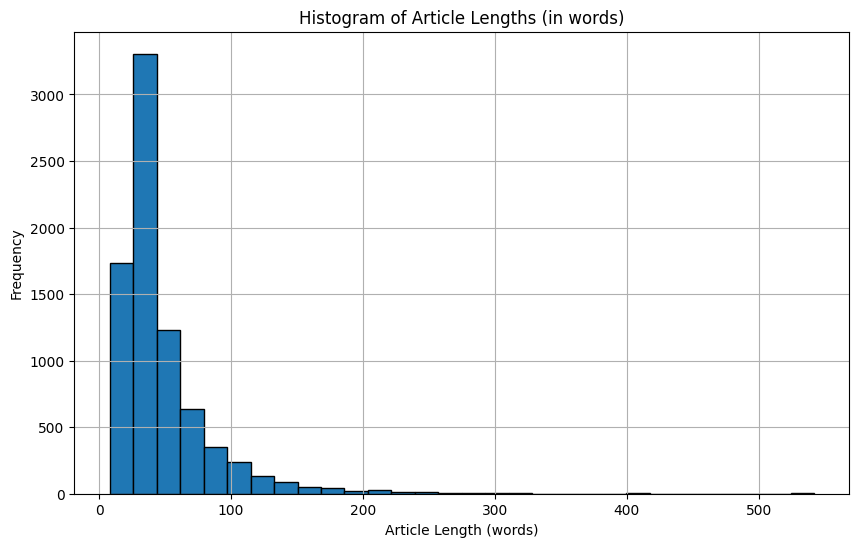

In [ ]:
# Calculate the length of each article in words
reviews_df['article_len'] = reviews_df['cleaned_text'].apply(lambda x: len(x.split()))

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(reviews_df['article_len'], bins=30, edgecolor='black')
plt.title('Histogram of Article Lengths (in words)')
plt.xlabel('Article Length (words)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Task 2	-Sentiment Classifications ~ 3 sentiment classifiers at least one sentiment lexicon
		+ VADER (Valence Aware Dictionary and sEntiment Reasoner) -sentiment lexicon
		+ TextBlob
		+ SentiWordNet
		+ Bing Liu Lexicon
	- Apply a Majority Vote Scheme


installing required Libraries

In [ ]:
#!pip install textblob
#!pip install vaderSentiment
#!pip install transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00
